https://github.com/Shawn1993/cnn-text-classification-pytorch/

In [4]:
#imports

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

In [59]:
#list of engineering words and biological words

e_words = ['bridge', 'engineer', 'structure', 'tooling', 'concrete']
b_words = ['cell', 'biological', 'membrane', 'deforestationanizism', 'skin']

#convert each word into a list of characters

e_words = [list(e) for e in e_words]
b_words = [list(b) for b in b_words]

In [60]:
#find the maximum length of a word within all categories

e_and_b = e_words + b_words

max_len = max([len(w) for w in e_and_b])

print(max_len)

20


In [61]:
#pad all words (represented by list of characters) to the maximum length as CNN needs all the same length

for i, _ in enumerate(e_words):
    while len(e_words[i]) < max_len:
        e_words[i].append("<PAD>")
        
for i, _ in enumerate(b_words):
    while len(b_words[i]) < max_len:
        b_words[i].append("<PAD>")

In [62]:
#check they are all maximum length

for e in e_words:
    print(e)
    assert len(e) == max_len
    
for b in b_words:
    print(b)
    assert len(b) == max_len

['b', 'r', 'i', 'd', 'g', 'e', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['e', 'n', 'g', 'i', 'n', 'e', 'e', 'r', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['s', 't', 'r', 'u', 'c', 't', 'u', 'r', 'e', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['t', 'o', 'o', 'l', 'i', 'n', 'g', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['c', 'o', 'n', 'c', 'r', 'e', 't', 'e', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['c', 'e', 'l', 'l', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['b', 'i', 'o', 'l', 'o', 'g', 'i', 'c', 'a', 'l', '<PAD>', '<PAD>', '<PAD>', '<PA

In [63]:
#build a vocabulary word

vocab = set()

e_and_b = e_words + b_words

for eb in e_and_b:
    vocab.update(eb)
    
print(vocab)

{'o', 'e', 'k', 'r', 'z', 'i', 'd', 'a', '<PAD>', 'n', 's', 't', 'u', 'm', 'f', 'c', 'g', 'b', 'l'}


In [64]:
#create a look-up-table between characters and indices and back

char2idx = {c:i for i,c in enumerate(vocab)}
idx2char = {i:c for i,c in enumerate(vocab)}

print(char2idx)
print(idx2char)

{'o': 0, 'e': 1, 'k': 2, 'r': 3, 'z': 4, 'i': 5, 'd': 6, 'a': 7, '<PAD>': 8, 'n': 9, 's': 10, 't': 11, 'u': 12, 'm': 13, 'f': 14, 'c': 15, 'g': 16, 'b': 17, 'l': 18}
{0: 'o', 1: 'e', 2: 'k', 3: 'r', 4: 'z', 5: 'i', 6: 'd', 7: 'a', 8: '<PAD>', 9: 'n', 10: 's', 11: 't', 12: 'u', 13: 'm', 14: 'f', 15: 'c', 16: 'g', 17: 'b', 18: 'l'}


In [65]:
#words (as list of characters) are now represented as list of indices

e_index = []
b_index = []

for e in e_words:
    ei = [char2idx[c] for c in e]
    e_index.append(ei)
    
for b in b_words:
    bi = [char2idx[c] for c in b]
    b_index.append(bi)
    
for i, _ in enumerate(b_words):
    print(b_words[i])
    print(b_index[i])

['c', 'e', 'l', 'l', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
[15, 1, 18, 18, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
['b', 'i', 'o', 'l', 'o', 'g', 'i', 'c', 'a', 'l', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
[17, 5, 0, 18, 0, 16, 5, 15, 7, 18, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
['m', 'e', 'm', 'b', 'r', 'a', 'n', 'e', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
[13, 1, 13, 17, 3, 7, 9, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
['d', 'e', 'f', 'o', 'r', 'e', 's', 't', 'a', 't', 'i', 'o', 'n', 'a', 'n', 'i', 'z', 'i', 's', 'm']
[6, 1, 14, 0, 3, 1, 10, 11, 7, 11, 5, 0, 9, 7, 9, 5, 4, 5, 10, 13]
['s', 'k', 'i', 'n', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
[10, 2, 5, 9, 8, 8

In [66]:
#build the dataset which each element being: [[indices], class]

data = []

for ei in e_index:
    data.append([ei, 0]) #engineering = 0
for bi in b_index:
    data.append([bi, 1]) #biological= 1
    
print(data[0])

[[17, 3, 5, 6, 16, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], 0]


In [95]:
#create model

class Net(nn.Module):
    def __init__(self, vocab_size, max_len, embedding_size, num_channels, output_size):
        super(Net, self).__init__()
        
        #embedding layer to turn indices into vectors
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        
        #pass 3 convolutional layers over the embedding matrix with kernel sizes of 3, 4 and 5
        self.conv1_3 = nn.Conv2d(in_channels=1, out_channels=num_channels, kernel_size=(3,embedding_size)) #kernel_size is HxW
        self.conv1_4 = nn.Conv2d(in_channels=1, out_channels=num_channels, kernel_size=(4,embedding_size))
        self.conv1_5 = nn.Conv2d(in_channels=1, out_channels=num_channels, kernel_size=(5,embedding_size))
        
        #linear layer from the concatenated convolutional layers to the output
        self.fc1 = nn.Linear(num_channels*3, output_size) 
        
    def forward(self, x):
 
        # x = [max_len]
        
        x = x.unsqueeze(0)
        # x = [1, max_len]
        
        x = self.embedding(x)
        # x = [1, max_len, embedding_size]
        
        x = x.unsqueeze(0)
        # x = [1, 1, max_len, embedding_size]
        
        x_conv1_3 = F.relu(self.conv1_3(x)).squeeze(3)
        # after conv2d -> x_conv1_3 = [1, num_channels, max_len-2, 1]
        # after squeeze(3) -> x_conv1_3 = [1, num_channels, max_len-2]
        
        x_conv1_4 = F.relu(self.conv1_4(x)).squeeze(3)
        # x_conv1_4 = [1, num_channels, max_len-3]

        x_conv1_5 = F.relu(self.conv1_5(x)).squeeze(3)
        # x_conv1_5 = [1, num_channels, max_len-4]

        x_conv1_3 = F.max_pool1d(x_conv1_3, kernel_size=x_conv1_3.size(2)).squeeze(2) #gets maximum value of each filter
        # after max_pool -> x_conv1_3 = [1, num_channels, 1]
        # after squeeze(2) -> x_conv1_3 = [1, num_channels]
        
        x_conv1_4 = F.max_pool1d(x_conv1_4, kernel_size=x_conv1_4.size(2)).squeeze(2)
        # x_conv1_4 = [1, num_channels]

        x_conv1_5 = F.max_pool1d(x_conv1_5, kernel_size=x_conv1_5.size(2)).squeeze(2)
        # x_conv1_5 = [1, num_channels]

        x = torch.cat((x_conv1_3, x_conv1_4, x_conv1_5),1)
        # x_conv1_3 = [1, num_channels*3]

        x = self.fc1(x)
        # x = [1, output_size]
        
        return x

In [96]:
#create instance of Net class

net = Net(len(vocab), max_len, 64, 100, 2)

In [97]:
#define some parameters

epochs = 10
batch_size = 32
learning_rate = 0.001
momentum = 0.9

In [98]:
#for plotting

plot_loss = []
plot_correct = []

In [99]:
#define loss and optimizer

criterion = nn.CrossEntropyLoss() #cross entropy loss = log softmax + NLL loss
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

In [100]:
#training function

def train(model, criterion, optimizer, x, y):
    x = Variable(x, requires_grad=False)
    y = Variable(y, requires_grad=False)
    
    # reset gradient
    optimizer.zero_grad()

    # forward pass
    fx = model.forward(x)
    
    # get the loss
    loss = criterion(fx, y)

    # backward pass
    loss.backward()

    # update parameters
    optimizer.step()

    # return the actual loss data, not the Variable
    return loss.data[0]

In [101]:
num_examples = len(data)

for e in range(1, epochs+1):
    loss = 0.
    for d in data[:2]:
        x = torch.LongTensor(d[0]) #converts list of indices to tensor of indices
        y = torch.LongTensor([d[1]]) #need the target class to be inside a list
        loss += train(net, criterion, optimizer, x, y)
    plot_loss.append(loss/num_examples)
    print("Epoch %02d, loss = %f" % (e, loss / num_examples))

Epoch 01, loss = 0.139004
Epoch 02, loss = 0.070662
Epoch 03, loss = 0.022813
Epoch 04, loss = 0.006891
Epoch 05, loss = 0.002381
Epoch 06, loss = 0.000977
Epoch 07, loss = 0.000469
Epoch 08, loss = 0.000258
Epoch 09, loss = 0.000158
Epoch 10, loss = 0.000106


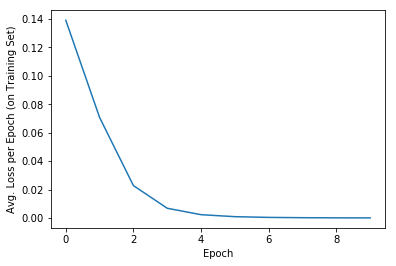

In [102]:
import matplotlib.pyplot as plt

plt.plot(plot_loss)
plt.xlabel('Epoch')
plt.ylabel('Avg. Loss per Epoch (on Training Set)')
plt.show()